In [1]:
#CASE: SYSTEM OF TWO STANDALONE GAS-LIFTED WELLS
#AUTHOR: MILAN STANKO, NTNU, COURSE: TPG4230
#IMPORTING NEEDED LIBRARIES
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GLPerf_qo(a, b, c, d,e, qgi):
    res =a*np.power(qgi,4)+ b*np.power(qgi,3)+c*np.power(qgi,2)+d*qgi+e  #performance curve fitted to 4th degree polynomial
    return res

In [3]:
#gas lift performance curve data for two wells
a1=-3.9e-7  #(1/1e03 Sm3/d)^3
b1=2.1e-4   #(1/1e03 Sm3/d)^2
c1=-0.043   #(1/1e03 Sm3/d)
d1=3.7      #
e1=12       #(1e03 Sm3/d)
a2=-1.3e-7  #(1/1e03 Sm3/d)^3
b2=1e-4     #(1/1e03 Sm3/d)^2
c2=-0.028   #(1/1e03 Sm3/d)
d2=3.1
e2=-17       #(1e03 Sm3/d)
Po=6.29*80   #oil price USD/Sm3
Pg=2/8     #gas price, USD/Sm3

In [4]:
#BRUTE-FORCE COMPUTING ALL COMBINATIONS
npoints=100
qgi_max=200  #[1e03 Sm3/d]
qgi_w1=np.linspace(0,qgi_max,npoints)
qgi_w2=np.linspace(0,qgi_max,npoints)
qotot=[]
qgitot=[]
revenue=[]
#computing objective (total oil production or revenue) and
#constraint, total gas injected
for qgi1 in qgi_w1:
    qo1=GLPerf_qo(a1,b1,c1,d1,e1,qgi1)
    for qgi2 in qgi_w2:
        qo2=GLPerf_qo(a2,b2,c2,d2,e2,qgi2)
        qotot=np.append(qotot,qo1+qo2)
        qgitot=np.append(qgitot,qgi1+qgi2)
        revenue=np.append(revenue,(qo1+qo2)*Po-(qgi1+qgi2)*Pg)
revenue=revenue/1e3

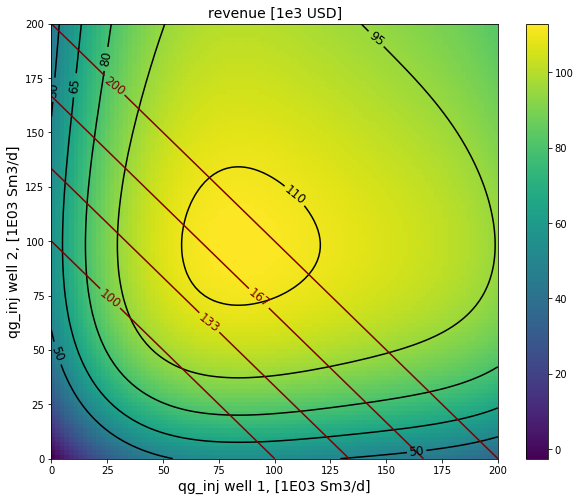

In [7]:
#CREATING COLORMAPS AND CONTOUR PLOTS OF OBJECTIVE VARIABLE (total oil production) 
#AND CONSTRAINED VARIABLE (total gas injection rate)
obj_opt=2  #1 if oil rate, 2 if revenue
if obj_opt==2:
    obj=revenue
    tag='revenue [1e3 USD]'
    levels_obj=np.linspace(50,110,5)
elif obj_opt==1:
    obj=qotot
    tag='qo_total [Sm3/d]'
    levels_obj=np.linspace(50,210,5)
constr=qgitot
#specifying desired number and range of contour lines
levels_qgi=np.linspace(100,200,4)
plt.figure(figsize=(10,8))
#creating mesh of qgin1,qgin2 to plot
xi,yi=np.mgrid[qgi_w1.min():qgi_w1.max():npoints*1j,qgi_w2.min():qgi_w2.max():npoints*1j]#another option to this is to use X,Y=np.meshgrid(DP1,DP2)
#Contour plot of objective function, total oil production
contour_obj=plt.contour(xi,yi,obj.reshape(xi.shape),levels=levels_obj,colors='black')
plt.clabel(contour_obj, inline=True, fmt='%1.0f',fontsize=12)
#Plot contour of constraint variable, total gas injection
contour_qgi=plt.contour(xi,yi,constr.reshape(xi.shape),levels=levels_qgi,colors='maroon')
plt.clabel(contour_qgi, inline=True,fmt='%1.0f', fontsize=12)
#plot color map of objective function, total oil production
plt.pcolormesh(xi,yi,obj.reshape(xi.shape))
#axis labels and plot title
plt.xlabel('qg_inj well 1, [1E03 Sm3/d]',fontsize=14)
plt.ylabel('qg_inj well 2, [1E03 Sm3/d]',fontsize=14)
plt.title(tag,fontsize=14)
plt.colorbar()
plt.show()